In [74]:
# Import classes from database managemnt class db_connection in db_connection.ipynb file

In [75]:
%run db_connection.ipynb

mongo = db_connection()


In [76]:
import pandas as pd

In [77]:
def get_actor_inventory_df(actor_id):
    data=mongo.get_actor_inventory(1)
    return pd.DataFrame(data["inventory_"+str(1)][0])

def get_actor_orders_df(actor_id):
    data=mongo.get_actor_orders(actor_id)
    return pd.DataFrame(data["orders_"+str(actor_id)][0]) 

def get_transactions_df():
    data=mongo.get_transactions()
    return pd.DataFrame(mongo.get_transactions())
 
def get_simulation_stats():
    stats=mongo.get_simulation_stats()
    return pd.DataFrame(stats["simulation_stats"][0])

In [78]:
get_simulation_stats()

,_id,simulation_id,active_actors,value
0,20220116_153012,20220116_153012,NaN,NaN
1,active_actors,NaN,"[1, 2, 3, 4, 5, 0]",NaN
2,cookbook,NaN,NaN,"{1001: {'2001': 1}, 2001: {'3001': 1}, 3001: {..."


In [79]:
def get_actor_stats(actor_id):
    transactions = get_transactions_df()
    actor_transactions = transactions.loc[transactions['receiver'] == actor_id]
    return actor_transactions[["lead_time"]].describe()

# get_actor_stats(1)


In [107]:
actor_id=2

transactions = get_transactions_df()
transactions


# transactions.loc[transactions['receiver'] == actor_id]

actor_transactions =pd.DataFrame( transactions["transactions"][0])
x=actor_transactions.loc[actor_transactions['receiver'] == actor_id]
# actor_transactions

actor_transactions.describe()
# actor_transactions[["lead_time"]].describe()
df = actor_transactions[actor_transactions['lead_time'] != False]
df1=df.loc[df['receiver'] == actor_id]


In [108]:
df1

,_id,deliver_day,order_id,order_criation_day,sending_day,receiver,sender,product,quantity,transit_time,lead_time,transaction_id,delivered,updated_day
36,37,22,3000001,18,18,2,3,3001,10,1,1,37,1.0,19.0
42,43,22,3000003,20,20,2,3,3001,60,1,1,43,1.0,21.0
79,80,34,3000011,28,29,2,3,3001,100,0,1,80,1.0,29.0
232,233,68,3000047,64,64,2,3,3001,100,1,1,233,1.0,65.0
247,248,71,3000051,68,68,2,3,3001,100,1,1,248,1.0,69.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1158,1159,356,3000337,354,354,2,3,3001,100,1,1,1159,1.0,355.0
1161,1162,358,3000338,355,355,2,3,3001,100,1,1,1162,1.0,356.0
1164,1165,360,3000339,356,356,2,3,3001,100,1,1,1165,1.0,357.0
1167,1168,361,3000340,357,357,2,3,3001,100,1,1,1168,1.0,358.0


<AxesSubplot:>

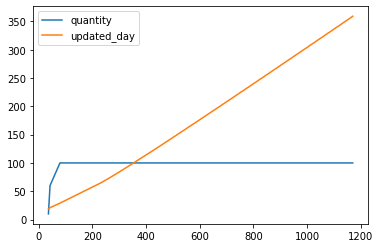

In [109]:

df1[["quantity","updated_day"]].plot()
